In [2]:
import numpy as np
from numba import jit, njit

In [3]:
def slow_func(dicts):
    return dicts['a']/dicts['b']

dicti = {'a': np.arange(0, 10, 1), 'b': np.arange(10, 20, 1), 'c': True}



In [4]:
%time slow_func(dicti)


CPU times: user 150 µs, sys: 30 µs, total: 180 µs
Wall time: 129 µs


array([0.        , 0.09090909, 0.16666667, 0.23076923, 0.28571429,
       0.33333333, 0.375     , 0.41176471, 0.44444444, 0.47368421])

In [5]:
def read(dicti):
    a = dicti['a']
    b = dicti['b']
    C = True
    return a, b, C
@jit
def slow_func_jit(a,b, C):
    if C == True:
        c = a/b
    return c

In [6]:
z = read(dicti)

In [7]:
%time slow_func_jit(read(dicti)[0], read(dicti)[1], read(dicti)[2])

CPU times: user 530 ms, sys: 164 ms, total: 694 ms
Wall time: 463 ms


array([0.        , 0.09090909, 0.16666667, 0.23076923, 0.28571429,
       0.33333333, 0.375     , 0.41176471, 0.44444444, 0.47368421])

In [8]:
%time slow_func_jit(a, b, C)

NameError: name 'a' is not defined

In [9]:
a = np.arange(0,10,1)
b = np.arange(10, 20, 1)

def clever_func(a, b):
    return a/b


In [10]:
%time clever_func(a, b)

CPU times: user 32 µs, sys: 8 µs, total: 40 µs
Wall time: 35 µs


array([0.        , 0.09090909, 0.16666667, 0.23076923, 0.28571429,
       0.33333333, 0.375     , 0.41176471, 0.44444444, 0.47368421])

In [11]:
@jit 
def clever_func_jit(a, b):
    return a/b

In [12]:
%time clever_func_jit(a,b)

CPU times: user 150 ms, sys: 0 ns, total: 150 ms
Wall time: 149 ms


array([0.        , 0.09090909, 0.16666667, 0.23076923, 0.28571429,
       0.33333333, 0.375     , 0.41176471, 0.44444444, 0.47368421])

### Make an example to understand how to speed up the code

    

In [13]:
def another_func(dicts):
    c = dicts['c']
    return c


def superslow_func(dicts, a, b):
    if another_func(dicts) == True:
        m = a/b
        return m

In [14]:
%time superslow_func(dicti, a, b)

CPU times: user 106 µs, sys: 22 µs, total: 128 µs
Wall time: 101 µs


array([0.        , 0.09090909, 0.16666667, 0.23076923, 0.28571429,
       0.33333333, 0.375     , 0.41176471, 0.44444444, 0.47368421])

In [15]:
@jit
def superslow_func_jit(dicts, a, b):
    if another_func(dicts) == True:
        m = a/b
        return m

In [16]:
%time superslow_func_jit(dicti, a, b)

CPU times: user 117 ms, sys: 0 ns, total: 117 ms
Wall time: 117 ms


<ipython-input-15-8ba3e1917441>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "superstupid_func_jit" failed type inference due to: Untyped global name 'another_func': Cannot determine Numba type of <class 'function'>

File "<ipython-input-15-8ba3e1917441>", line 3:
def superstupid_func_jit(dicts, a, b):
    if another_func(dicts) == True:
    ^

  @jit
/home/kathi/.local/lib/python3.9/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "superstupid_func_jit" was compiled in object mode without forceobj=True.

File "<ipython-input-15-8ba3e1917441>", line 2:
@jit
def superstupid_func_jit(dicts, a, b):
^

  warnings.warn(errors.NumbaWarning(warn_msg,
/home/kathi/.local/lib/python3.9/site-packages/numba/core/object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information v

array([0.        , 0.09090909, 0.16666667, 0.23076923, 0.28571429,
       0.33333333, 0.375     , 0.41176471, 0.44444444, 0.47368421])

In [19]:
@njit
def sum_func(a, b, name):
    if name == 'Lilli':
        d = a.sum(axis=0)
    e = a/b
    return d, e



In [20]:
%time sum_func(a, b, name = 'Lilli')

CPU times: user 0 ns, sys: 1.3 ms, total: 1.3 ms
Wall time: 898 µs


(45,
 array([0.        , 0.09090909, 0.16666667, 0.23076923, 0.28571429,
        0.33333333, 0.375     , 0.41176471, 0.44444444, 0.47368421]))

In [19]:
@njit
def sillyfunc(a, b):
    return np.intersect1d(a,b)

In [20]:
%time sillyfunc(a,b)

CPU times: user 2.45 s, sys: 0 ns, total: 2.45 s
Wall time: 2.45 s


array([], dtype=int64)

In [21]:
def unsopnumpy(a):
    c = np.zeros(np.size(a))
    return c

def calculate(a):
    d = unsopnumpy(a) + a
    return d



In [22]:
%time calculate(a) 

CPU times: user 114 µs, sys: 9 µs, total: 123 µs
Wall time: 112 µs


array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [23]:
def unsopnumpy(a):
    c = np.zeros(np.size(a))
    return c

@jit
def calculate(a):
    d = unsopnumpy(a) + a
    return d


In [24]:
%time calculate(a)

CPU times: user 49.7 ms, sys: 0 ns, total: 49.7 ms
Wall time: 48.7 ms


<ipython-input-23-bbc0fc3e36da>:5: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "calculate" failed type inference due to: Untyped global name 'unsopnumpy': Cannot determine Numba type of <class 'function'>

File "<ipython-input-23-bbc0fc3e36da>", line 7:
def calculate(a):
    d = unsopnumpy(a) + a
    ^

  @jit
/home/kathi/.local/lib/python3.9/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "calculate" was compiled in object mode without forceobj=True.

File "<ipython-input-23-bbc0fc3e36da>", line 6:
@jit
def calculate(a):
^

  warnings.warn(errors.NumbaWarning(warn_msg,
/home/kathi/.local/lib/python3.9/site-packages/numba/core/object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#de

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [25]:
def sizef(a):
    b = np.zeros(a.size)
    return b

In [26]:
%time sizef(a)

CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 14.3 µs


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
@jit
def sizef_jit(a):
    b = np.zeros(a.size)
    return b

In [28]:
%time sizef_jit(a)

CPU times: user 78.3 ms, sys: 3.85 ms, total: 82.2 ms
Wall time: 81.4 ms


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [82]:
import time as t
import matplotlib.pyplot as plt

def timer(function):
    times = []
    for i in range(10000000):
        start = t.time_ns()
        function
        end = t.time_ns()
        times.append(end-start)
    plt.plot(times)
    plt.show()
    mean = sum(times)/len(times)
    print('mean: ' + str(mean) + ' ns')
    return
    

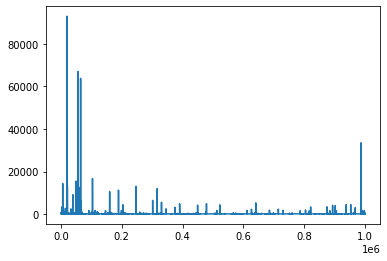

mean: 108.570094 ns


In [30]:
timer(sizef(a))

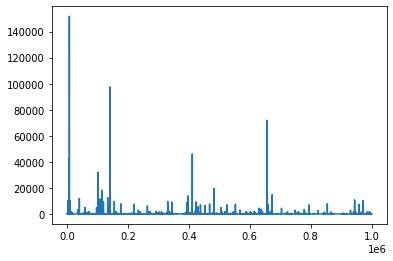

mean: 108.697685 ns


In [31]:
timer(sizef_jit(a))

### Troubleshooting w()
I have to try all the functions that are called by w().


In [32]:
# np.interp()

xp = np.array([1, 2, 3])
fp = np.array([3, 2, 0])

def interpolate(xp, fp):
    return np.interp(2.5, xp, fp)

@njit
def interpolate_jit(xp, fp):
    return np.interp(2.5, xp, fp)

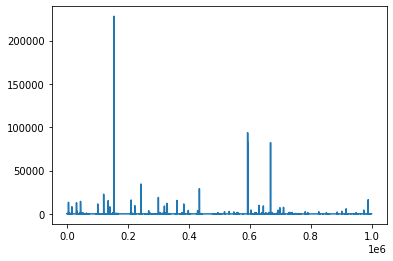

mean: 106.069382 ns


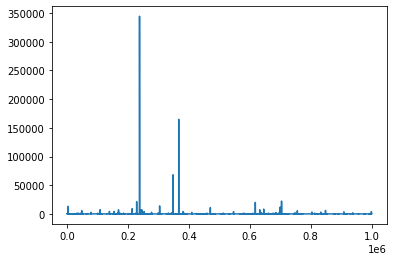

mean: 105.201235 ns
<class 'numpy.float64'>


In [33]:
timer(interpolate(xp, fp))
timer (interpolate_jit(xp, fp))
print(type(interpolate(xp, fp)))

In [34]:
# np.exp()

def expo(a):
    return np.exp(a)

@njit
def expo_jit(a):
    return np.exp(a)

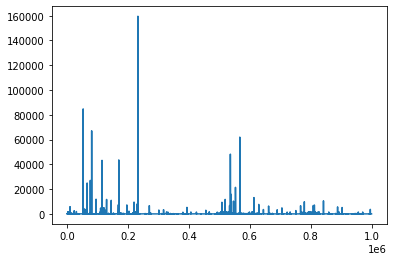

mean: 114.039577 ns


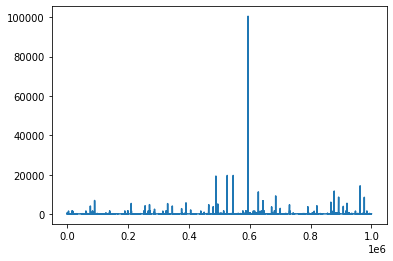

mean: 103.830634 ns
<class 'numpy.ndarray'>


In [35]:
timer(expo(a))
timer(expo_jit(a))
print(type(expo(a)))

In [36]:
# np.where

def wheref(a):
    return np.where(a > 1)

@njit
def wheref_jit(a):
    return np.where(a > 1)   

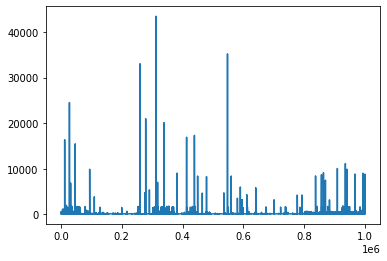

mean: 129.200875 ns


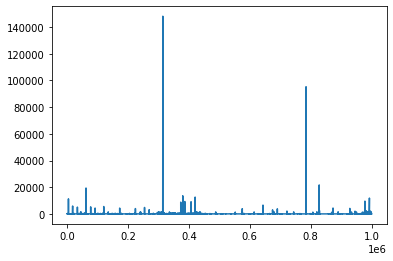

mean: 108.353558 ns
<class 'tuple'>


In [37]:
timer(wheref(a))
timer(wheref_jit(a))
print(type(wheref(a)))

In [38]:
# np.intersect1d()

def intersect1df(a, b):
    return np.intersect1d(a,b)

@njit
def intersect1df_jit(a, b):
    return np.intersect1d(a,b)


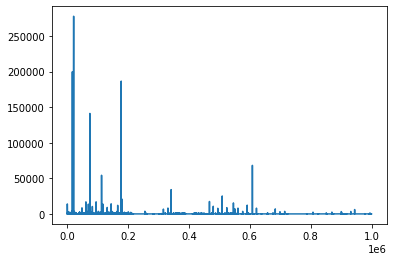

mean: 107.992104 ns


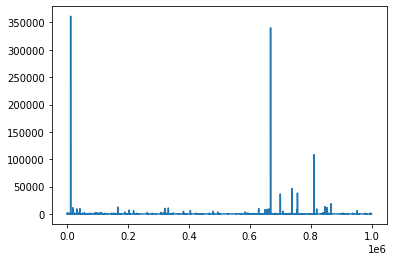

mean: 113.972464 ns
<class 'numpy.ndarray'>


In [39]:
timer(intersect1df)
timer(intersect1df_jit)
print(type(intersect1df(a,b)))

In [40]:
# .len()

def lenf(a):
    return len(a)

@njit
def lenf_jit(a):
    return len(a)

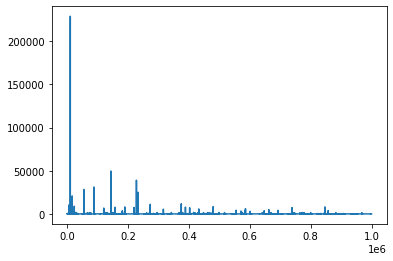

mean: 106.503171 ns


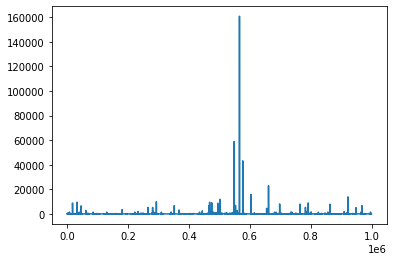

mean: 111.951388 ns
<class 'int'>


In [41]:
timer(lenf(a))
timer(lenf_jit(a))
print(type(lenf(a)))

In [42]:
# np.reshape()

def reshapef(a):
    return np.reshape(a, (2, 5))

@njit
def reshapef_jit(a):
    return np.reshape(a, (2, 5))

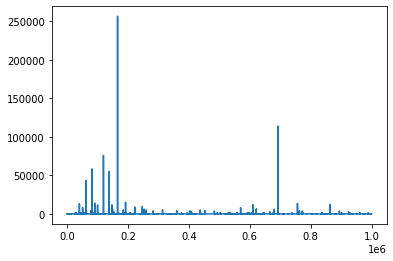

mean: 102.030984 ns


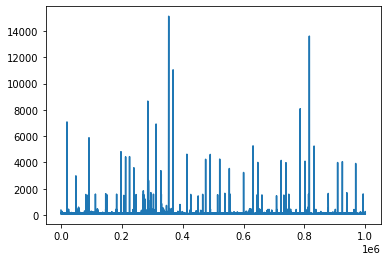

mean: 98.292971 ns


numpy.ndarray

In [43]:
timer(reshapef(a))
timer(reshapef_jit(a))
type(reshapef(a))

In [44]:
# np.log()

def logf(a):
    return np.log(a)

@jit
def logf_jit(a):
    return np.log(a)

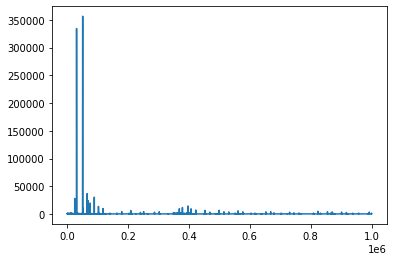

mean: 105.031086 ns


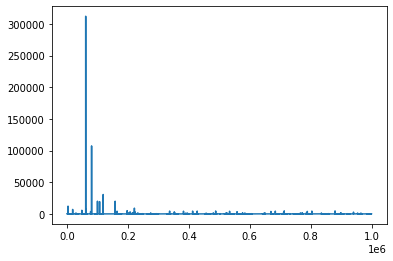

mean: 101.041868 ns


numpy.ndarray

In [45]:
timer(logf(b))
timer(logf_jit(b))
type(logf(b))

In [46]:
# .T

def Tf(a):
    return a.T

@jit
def Tf_jit(a):
    return a.T

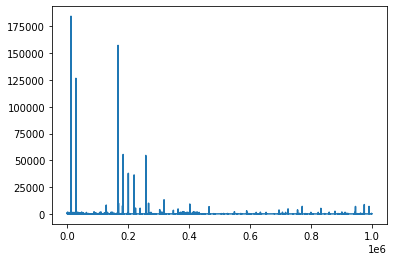

mean: 106.043099 ns


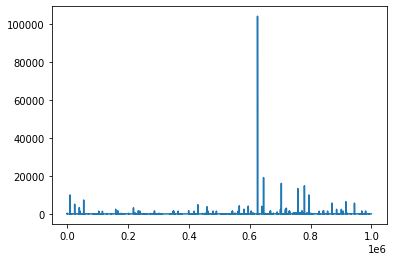

mean: 100.52891 ns


numpy.ndarray

In [47]:
timer(Tf(a))
timer(Tf_jit(a))
type(Tf(a))

In [48]:
# .sum

def sumf(a):
    return a.sum(axis=0)
    
@njit
def sumf_jit(a):
    return a.sum(axis=0)

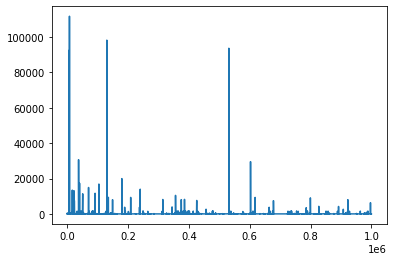

mean: 102.96977 ns


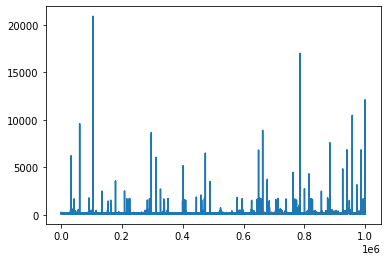

mean: 106.751662 ns
<class 'numpy.int64'>


In [49]:
timer(sumf(a))
timer(sumf_jit(a))
print(type(sumf(a)))

In [50]:
# np.minimum

def minimumf(a, b):
    return np.minimum(a, b)

@njit
def minimumf_jit(a, b):
    return np.minimum(a, b)

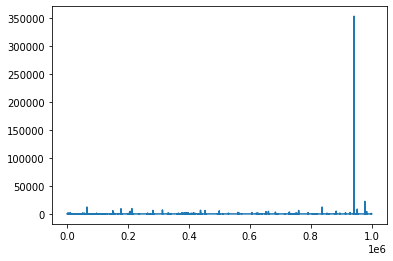

mean: 103.039468 ns


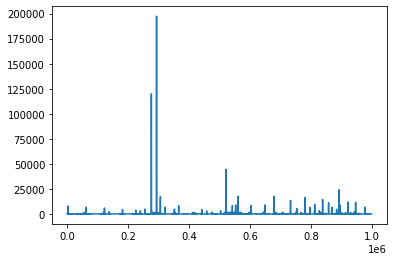

mean: 102.48984 ns


numpy.ndarray

In [51]:
timer(minimumf(a, b))
timer(minimumf_jit(a, b))
type(minimumf(a, b))

In [52]:
# np.maximum

def maximumf(a, b):
    return np.maximum(a,b)

@njit
def maximumf_jit(a, b):
    return np.maximum(a, b)

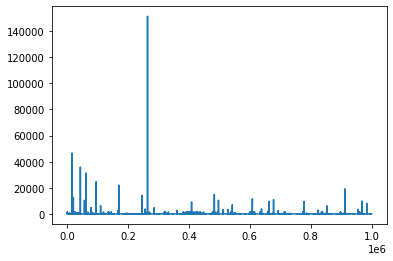

mean: 105.869196 ns


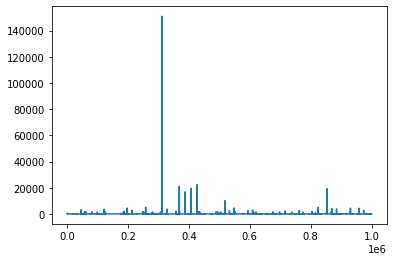

mean: 98.235837 ns


numpy.ndarray

In [53]:
timer(maximumf(a, b))
timer(maximumf_jit(a, b))
type(maximumf(a, b))

In [54]:
# np.zeros_like

def zerosl(a):
    return np.zeros_like(a)

@njit
def zerosl_jit(a):
    return np.zeros_like(a)

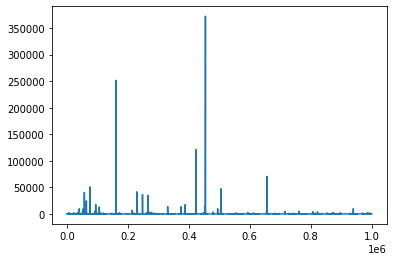

mean: 106.906985 ns


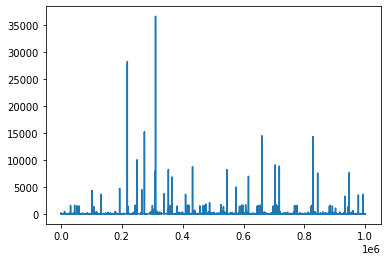

mean: 104.704148 ns


numpy.ndarray

In [55]:
timer(zerosl(a))
timer(zerosl_jit(a))
type(zerosl(a))

In [56]:
# np.abs()

def absf(a):
    return np.abs(a)

@njit
def absf_jit(a):
    return np.abs(a)

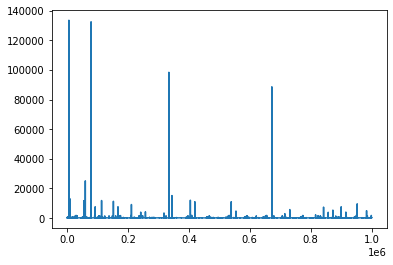

mean: 104.717129 ns


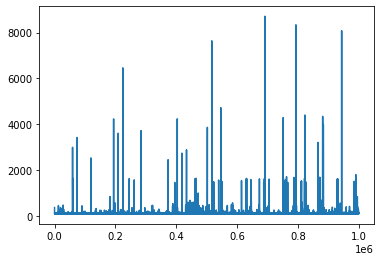

mean: 104.825889 ns


numpy.ndarray

In [57]:
timer(absf(a))
timer(absf_jit(a))
type(absf(a))

In [58]:
# .size or np.size()

def sizef(a):
    return a.size

@njit
def sizef_jit(a):
    return a.size

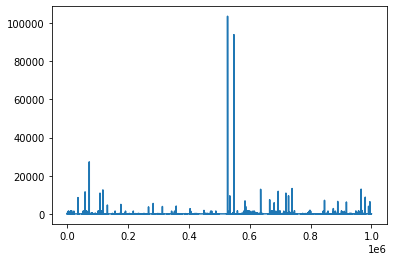

mean: 110.879917 ns


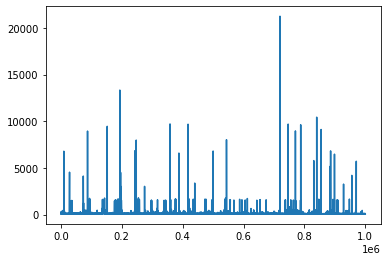

mean: 105.193105 ns


int

In [59]:
timer(sizef(a))
timer(sizef_jit(a))
type(sizef(a))

In [62]:
a = np.array([[1,2,3], [4, 5, 6]])

In [72]:
def summarize(a):
    return a.sum()


@njit 
def summarize_jit(a):
    return a.sum()

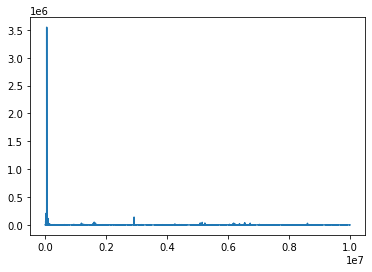

mean: 101.3054229 ns


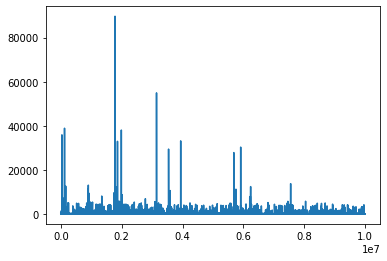

mean: 100.2675192 ns


In [84]:
timer(summarize(a))
timer(summarize_jit(a))

In [75]:
def summarize2(a):
    return np.sum(a)


@njit 
def summarize2_jit(a):
    return np.sum(a)

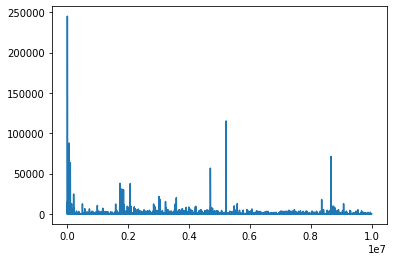

mean: 100.5996724 ns


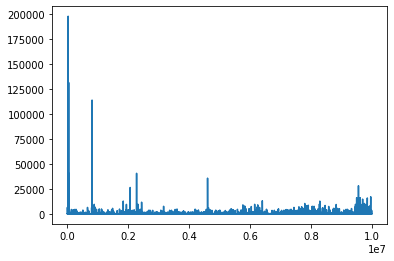

mean: 101.1818188 ns


In [85]:
timer(summarize2(a))
timer(summarize2_jit(a))